## <Center> <HR> <font color="blue"> Minimum swaps required to bring all elements less than or equal to k together </font> <HR> </Center>
   
   Let S: $(a_1, a_2, ..., a_n)$ be the sequence of numbers and $k \in Z$. Rearrange the sequence such that
   $$ x <= k \hspace{2mm} \forall x \in S_{1} \text{ where } S_{1} \subseteq S $$ 
   Compute minimum swaps required for the above rearrangement.

## 1. Naive Approach based on Subarray
    Time complexity : O(n^2) || Auxiliary Space : O(1)

In [51]:
def findMinimumSwaps_1(arr, n, k):
    
    size_S1 = 0
    for i in range(n):
        if arr[i] <= k:
            size_S1 += 1
            
    max_number_of_element_lessThan_k = 0
    for i in range(0, n - size_S1 + 1):  #Generate all SubArray of size_S1
        count = 0
        for j in range(i, i + size_S1):  
            if arr[j] <= k:
                count += 1
        max_number_of_element_lessThan_k = max(max_number_of_element_lessThan_k, count)
    
    return size_S1 - max_number_of_element_lessThan_k

## 2. Using Sliding Window Concept
    Time complexity : O(n) || Auxiliary Space : O(1)

In [61]:
def findMinimumSwaps_2(arr, n, k):
    
    size_S1 = 0
    for i in range(n):  #Computer the size of window
        if arr[i] <= k:
            size_S1 += 1

    max_number_of_element_lessThan_k = 0 
    for i in range(size_S1):     #First Window 
        if arr[i] <= k:
            max_number_of_element_lessThan_k += 1
    
    left, right = 1, size_S1   #Index of Second Window 
    cur_count = max_number_of_element_lessThan_k
    while right < n:   #Proceed rest of the windows
        if arr[left - 1] <=k:
            cur_count -= 1
        if arr[right] <=k:
            cur_count += 1
        max_number_of_element_lessThan_k = max(max_number_of_element_lessThan_k, cur_count)
        
        left += 1
        right += 1
        
    return size_S1 - max_number_of_element_lessThan_k

## Testing

In [60]:
n = int(input())
arr = list(map(int, input().strip().split()))
k = int(input())
count = findMinimumSwaps_2(arr, n, k)
print(count)

7
2 7 9 5 8 7 4
5
2


## Comparison of Different Approaches

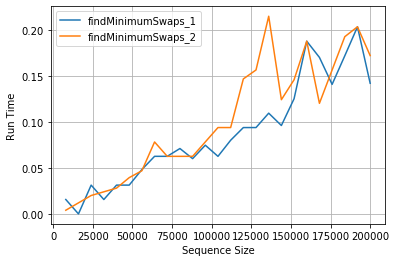

In [54]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt 
%matplotlib inline


n_execution = 25
k_list = np.random.randint(100, 1000, n_execution)
arr_list = [np.random.randint(k_list[i-1], 10000, 8000*i) + np.random.randint(0,k_list[i-1]) for i in range(1,n_execution+1)]

for fun in ["findMinimumSwaps_1", "findMinimumSwaps_2"]:
    
    times, arr_size = [], []
    for arr, k in zip(arr_list, k_list):
        random.shuffle(arr)
        n = len(arr)
        
        s = time.time()
        eval(fun)(arr, n, k)
        e = time.time()
        
        times.append(e-s)
        arr_size.append(n)
        
    plt.plot(arr_size, times, label = fun) 
    
plt.xlabel('Sequence Size') 
plt.ylabel('Run Time') 
plt.grid() 
plt.legend()
plt.show() 